# Assignment 1

## Read data

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Read training data
D = pd.read_csv("data/DST_BIL54.csv")

# Equivalent di str(D) in R
print(D.info())
print(D.head())

D["time"] = pd.to_datetime(D["time"].astype(str) + "-01", format="%Y-%m-%d", utc=True)

print(D["time"])
print(D["time"].dtype)

<class 'pandas.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   time          84 non-null     str  
 1   total         84 non-null     int64
 2   gasoline      84 non-null     int64
 3   diesel        84 non-null     int64
 4   fgas          84 non-null     int64
 5   ngas          84 non-null     int64
 6   electricity   84 non-null     int64
 7   petroleum     84 non-null     int64
 8   hydrogen      84 non-null     int64
 9   methanol      84 non-null     int64
 10  ethanol       84 non-null     int64
 11  pluginhybrid  84 non-null     int64
 12  otherfuels    84 non-null     int64
dtypes: int64(12), str(1)
memory usage: 8.7 KB
None
      time    total  gasoline   diesel  fgas  ngas  electricity  petroleum  \
0  2018-01  2930483   1781826  1136656    12   256         9304          0   
1  2018-02  2934044   1783338  1138414    12   255         9343          0   
2  2018

## 1. Plot data

In [44]:
D["year"] = D["time"].dt.year + (D["time"].dt.month - 1) / 12.0

# Make output variable floating point and scale
D["total"] = pd.to_numeric(D["total"], errors="coerce") / 1e6

# Divide into train and test set
teststart = pd.Timestamp("2024-01-01", tz="UTC")
Dtrain = D[D["time"] < teststart].copy()
Dtest  = D[D["time"] >= teststart].copy()

[2.930483 2.934044 2.941422 2.951498 2.963093 2.973721 2.976096 2.985537
 2.983209 2.982473 2.98453  2.984123 2.988432 2.991279 3.002834 3.008125
 3.016558 3.025807 3.027397 3.034273 3.03348  3.03097  3.03212  3.03209
 3.036213 3.037617 3.036205 3.040346 3.04856  3.060994 3.072466 3.081409
 3.085458 3.087414 3.091698 3.100222 3.139166 3.139557 3.154415 3.162174
 3.173165 3.185814 3.191486 3.19945  3.200838 3.198798 3.198864 3.204309
 3.202713 3.20372  3.209522 3.215399 3.21942  3.223647 3.222857 3.223624
 3.218379 3.210424 3.207359 3.209511 3.205688 3.204567 3.210827 3.216852
 3.221263 3.228278 3.227684 3.228835 3.226588 3.220559 3.22192  3.227541] [3.223801 3.223805 3.231177 3.237629 3.244611 3.255073 3.254569 3.25806
 3.256515 3.252275 3.253059 3.258025]


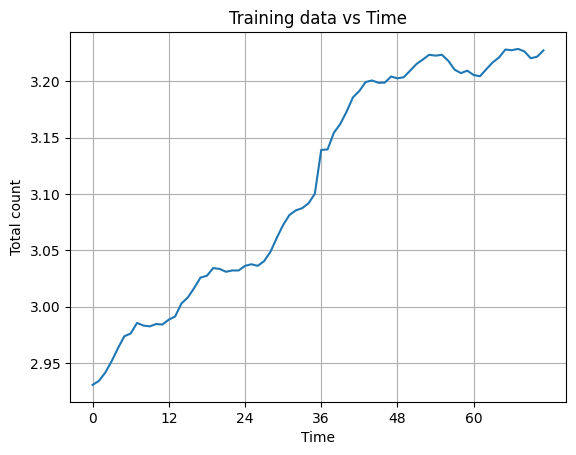

In [45]:
X = Dtrain["year"].values

y = Dtrain["total"].to_numpy()          # heights
n = len(y)
y_test = Dtest["total"].to_numpy()

print(y, y_test)
x_labels = [f"x{i}" for i in range(1, n+1)]  # x1..xn
x_pos = np.arange(n)                         # 0..n-1 positions

#plt.figure()
#plt.bar(x_pos, y)

#plt.xticks(x_pos, x_labels, rotation=90)  # rotate so labels fit
#plt.xlabel("Observations (x1..x{})".format(n))
#plt.ylabel("Total (millions)")
#plt.title("Total values for training set")
#plt.tight_layout()



plt.plot(x_pos,y)
plt.xticks(np.arange(0, n, 12))   # tick κάθε 12 μονάδες
plt.xlabel("Time")
plt.ylabel("Total count")
plt.title("Training data vs Time")
plt.grid(True)
plt.show()


#plt.show()
#print("Train shape:", Dtrain.shape)
##print("Test shape:", Dtest.shape)
#Dtrain.to_csv("train.csv", index=False)
#Dtest.to_csv("test.csv", index=False)

The time series exhibits a clear upward trend over the entire observation period. At the beginning of 2018, the total count is approximately 2.94 million, and it gradually increases to nearly 3.24 million by the end of 2023. The growth appears relatively smooth, with only minor short-term fluctuations around the overall trend.

During the period corresponding to the COVID-19 pandemic (2020–2021), there is no substantial decline in the series. Instead, the upward trend continues, suggesting that the pandemic did not significantly reduce the overall number of vehicles. The series maintains a steady increase throughout the entire period.

## 2. Defining X and y

In [46]:
y3 = Dtrain["total"].to_numpy()
x3 = Dtrain["year"].to_numpy()
x3 = np.c_[np.ones(x3.shape), x3]   # adds a column of 1s in front

print(x3.shape)  # should be [2018. , 2018.0833..., 2018.1666...]
print(y3.shape)  # your first 3 totals (in millions)

(72, 2)
(72,)


## OLS

To calculate $\hat{\theta}$ we can use the following formula:
$$ \hat{\theta} = (x^T x)^{-1} x^T Y$$

In [47]:
x3t = np.transpose(x3)
A = np.linalg.inv(x3t @ x3)
B = x3t @ y3
theta = A @ B
print(theta.shape)
print(theta)

(2,)
[-1.10355428e+02  5.61445562e-02]


0.0006828256631928707
0.006908210521844063 3.0598474930629508e-06


<>:23: SyntaxWarning: "\," is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\,"? A raw string is also an option.
<>:23: SyntaxWarning: "\," is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\,"? A raw string is also an option.
/var/folders/2w/4_sfnk5966zfh99dg079bc780000gn/T/ipykernel_38819/3340783396.py:23: SyntaxWarning: "\," is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\,"? A raw string is also an option.
  plt.title("$E\,[Y_t | x_t]= \hat{\\theta}_1 + \hat{\\theta}_2x_t$")


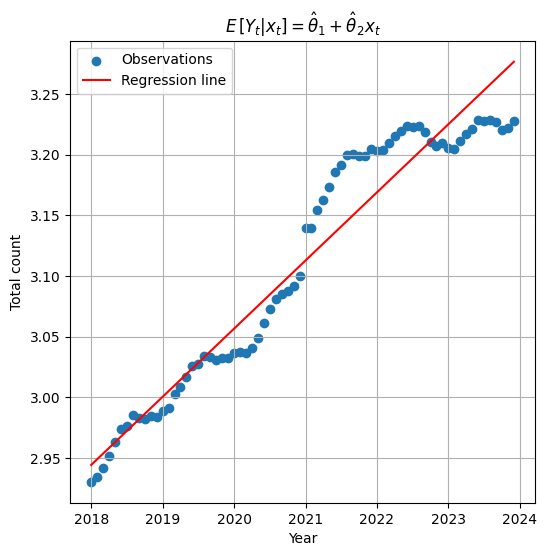

In [48]:
n = len(x3) #number of samples
p = 2 # number of parameters
C = y3 - x3 @ theta
sigma_sq = (np.transpose(C)@(C))/(n-p)
print(sigma_sq)

col_mean = np.mean(x3, axis=0)
x_mean = col_mean[1]
S_xx = (len(x3) - 1) * np.var(x3, ddof=1)

sigma1 = np.sqrt(sigma_sq*(1/n + (x_mean)**2/S_xx))
sigma2 = np.sqrt(sigma_sq/S_xx)

print(sigma1, sigma2)
x_plot = np.linspace(x3[0, 1], x3[-1, 1], 1000)
f = lambda x: theta[0] + x * theta[1]

plt.figure(figsize=(6,6))
plt.scatter(x3[:, 1], y3, label='Observations')
plt.plot(x_plot, f(x_plot), label='Regression line', color ='r')
plt.xlabel('Year')
plt.ylabel('Total count')
plt.title("$E\,[Y_t | x_t]= \hat{\\theta}_1 + \hat{\\theta}_2x_t$")
plt.grid(True)
plt.legend();


In [49]:
sigma = float(np.sqrt(sigma_sq))
x_test = Dtest["year"].values
y_pred = theta[0] + theta[1] * x_test
y_real = y_pred + np.random.normal(0, sigma, size=len(x_test)) #i just want to know why we did that and why we use that i think we need to predict the y_pred

#df = pd.DataFrame({"x_t": x_test, "y_t": y_pred})
#print(df)

df = pd.DataFrame({"x_t": x_test, "y_t": y_real})#maybe here we want to show the predicted values ?
print( df)

            x_t       y_t
0   2024.000000  3.314613
1   2024.083333  3.258059
2   2024.166667  3.254569
3   2024.250000  3.266700
4   2024.333333  3.303279
5   2024.416667  3.279889
6   2024.500000  3.239455
7   2024.583333  3.336189
8   2024.666667  3.298261
9   2024.750000  3.349400
10  2024.833333  3.302427
11  2024.916667  3.318739


In [50]:
def prediction_interval_ols(x_train, theta, sigma_sq, x_new, alpha=0.05):
    """
    1D OLS with intercept: y = theta[0] + theta[1]*x
    Returns: yhat, lower, upper for x_new (scalar or array)
    """
    x_train = np.asarray(x_train, dtype=float)
    x_new   = np.asarray(x_new, dtype=float)

    n = len(x_train)
    xbar = x_train.mean()
    Sxx  = np.sum((x_train - xbar)**2)

    sigma = float(np.sqrt(sigma_sq))
    tcrit = t.ppf(1 - alpha/2, df=n-2)

    yhat = theta[0] + theta[1]*x_new

    # prediction SE (note the +1 term!)
    se_pred = sigma * np.sqrt(1 + 1/n + (x_new - xbar)**2 / Sxx)

    lower = yhat - tcrit * se_pred
    upper = yhat + tcrit * se_pred
    return yhat, lower, upper

pred_int = prediction_interval_ols(x3[:, 1], theta, sigma_sq, x_test)

In [51]:
print(pred_int)

(array([3.28115371, 3.28583242, 3.29051113, 3.29518985, 3.29986856,
       3.30454727, 3.30922598, 3.3139047 , 3.31858341, 3.32326212,
       3.32794084, 3.33261955]), array([3.22757933, 3.23219776, 3.23681462, 3.24142994, 3.2460437 ,
       3.25065593, 3.25526662, 3.25987577, 3.2644834 , 3.26908952,
       3.27369411, 3.27829721]), array([3.33472808, 3.33946708, 3.34420764, 3.34894975, 3.35369341,
       3.35843862, 3.36318535, 3.36793362, 3.37268342, 3.37743473,
       3.38218756, 3.38694189]))


In [52]:
#in 3.3 they say present these values in a table 
# pred_int is (yhat, lower, upper)
yhat, lower, upper = pred_int

# x values for the test period
x_test = Dtest["year"].to_numpy()

# (optional) actual observed test values
y_test = Dtest["total"].to_numpy()

df_forecast = pd.DataFrame({
    "month": Dtest["time"].dt.strftime("%Y-%b").to_numpy(),  # needs your time column
    "yhat": yhat,
    "PI_lower": lower,
    "PI_upper": upper,
})

print(df_forecast)


       month      yhat  PI_lower  PI_upper
0   2024-Jan  3.281154  3.227579  3.334728
1   2024-Feb  3.285832  3.232198  3.339467
2   2024-Mar  3.290511  3.236815  3.344208
3   2024-Apr  3.295190  3.241430  3.348950
4   2024-May  3.299869  3.246044  3.353693
5   2024-Jun  3.304547  3.250656  3.358439
6   2024-Jul  3.309226  3.255267  3.363185
7   2024-Aug  3.313905  3.259876  3.367934
8   2024-Sep  3.318583  3.264483  3.372683
9   2024-Oct  3.323262  3.269090  3.377435
10  2024-Nov  3.327941  3.273694  3.382188
11  2024-Dec  3.332620  3.278297  3.386942


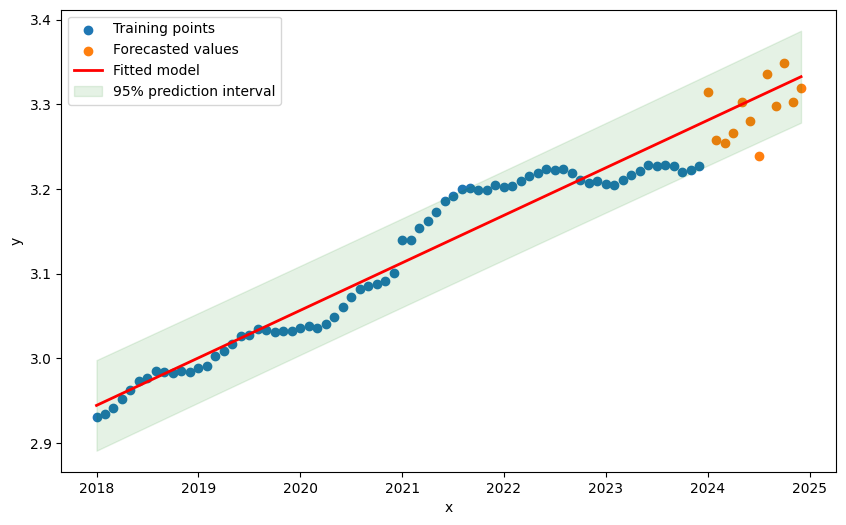

In [53]:
X = np.asarray(X, dtype=float)
y = np.asarray(y, dtype=float)
x_test  = np.asarray(x_test,  dtype=float)
y_test  = np.asarray(y_test,  dtype=float)
theta   = np.asarray(theta,   dtype=float)

# fitted function
f = lambda x: theta[0] + theta[1]*x

# ---- estimate sigma^2 from training residuals ----
n = len(X)
yhat_train = f(X)
resid = y - yhat_train
sigma_sq = np.sum(resid**2) / (n - 2)
sigma = np.sqrt(sigma_sq)

# ---- pieces for PI ----
xbar = X.mean()
Sxx  = np.sum((X - xbar)**2)
tcrit = t.ppf(0.975, df=n-2)  # 95% PI

# x grid for smooth line + band
x_plot = np.linspace(min(X.min(), x_test.min()),
                     max(X.max(), x_test.max()),
                     200)

yhat_plot = f(x_plot)
se_pred_plot = sigma * np.sqrt(1 + 1/n + (x_plot - xbar)**2 / Sxx)  # PI (note +1)
lo_plot = yhat_plot - tcrit * se_pred_plot
hi_plot = yhat_plot + tcrit * se_pred_plot

# ---- plot ----
plt.figure(figsize=(10,6))

plt.scatter(X, y, label='Training points', )
#plt.scatter(x_test, y_test, label='Test points')
plt.scatter(x_test, y_real, label="Forecasted values")

plt.plot(x_plot, yhat_plot, label='Fitted model', linewidth=2, color='r')
plt.fill_between(x_plot, lo_plot, hi_plot, alpha=0.1, label='95% prediction interval', color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 4. WLS


Sum of WLS weights (lambda=0.9): 9.9949
Sum of OLS weights (N): 72


<>:19: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:21: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:48: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:19: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:21: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:48: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
/var/folders/2w/4_sfnk5966zfh99dg079bc780000gn/T/ipykernel_38819/1775605244.

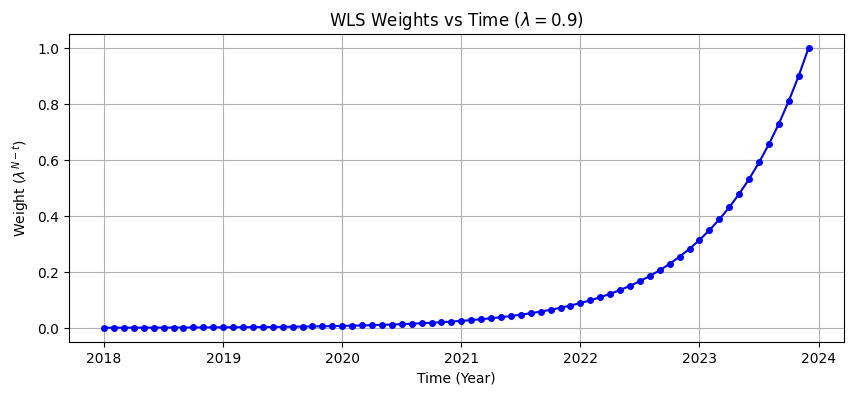

WLS Parameter Estimates (lambda=0.9):
theta1 (Intercept): -52.4829
theta2 (Slope): 0.0275


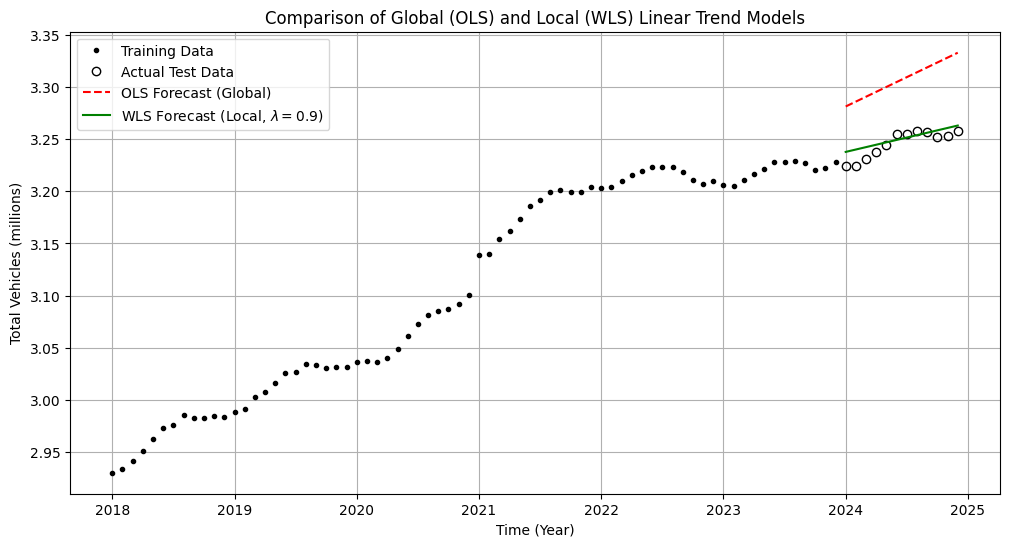

In [54]:
lmbda = 0.9
n_train = len(y) # number of training observations

# The weights are defined as lambda^(N-t), where N is the latest timepoint 
weights = np.array([lmbda**(n_train - i) for i in range(1, n_train + 1)])

# The weight matrix W for WLS
W = np.diag(weights)

sum_wls_weights = np.sum(weights)
sum_ols_weights = n_train

print(f"Sum of WLS weights (lambda={lmbda}): {sum_wls_weights:.4f}")
print(f"Sum of OLS weights (N): {sum_ols_weights}")

# Plotting the weights to visualize the local model
plt.figure(figsize=(10, 4))
plt.plot(Dtrain["year"], weights, 'o-', color='blue', markersize=4)
plt.title(f"WLS Weights vs Time ($\lambda = {lmbda}$)")
plt.xlabel("Time (Year)")
plt.ylabel("Weight ($\lambda^{N-t}$)")
plt.grid(True)
plt.show()

# 4.4 Estimating WLS Parameters 
X_train = np.c_[np.ones(n_train), Dtrain["year"].values]
y_train = y 

# theta_wls = (X^T * W * X)^-1 * X^T * W * y
XtWX = X_train.T @ W @ X_train
XtWy = X_train.T @ W @ y_train
theta_wls = np.linalg.inv(XtWX) @ XtWy

print(f"WLS Parameter Estimates (lambda={lmbda}):")
print(f"theta1 (Intercept): {theta_wls[0]:.4f}")
print(f"theta2 (Slope): {theta_wls[1]:.4f}")

# 4.5
x_test_val = Dtest["year"].values
# Prediction: y_pred = theta1 + theta2 * x_test
y_pred_wls = theta_wls[0] + theta_wls[1] * x_test_val

# Visualizing OLS vs WLS predictions
plt.figure(figsize=(12, 6))
plt.plot(Dtrain["year"], y_train, 'k.', label="Training Data")
plt.plot(Dtest["year"], y_test, 'ko', mfc='none', label="Actual Test Data")
plt.plot(Dtest["year"], y_pred, 'r--', label="OLS Forecast (Global)") # from previous task [cite: 36]
plt.plot(Dtest["year"], y_pred_wls, 'g-', label=f"WLS Forecast (Local, $\lambda={lmbda}$)")

plt.title("Comparison of Global (OLS) and Local (WLS) Linear Trend Models")
plt.xlabel("Time (Year)")
plt.ylabel("Total Vehicles (millions)")
plt.legend()
plt.grid(True)
plt.show()

## RLS

In [78]:
#R_t= np.array([[0.1, 0],[0, 0.1]])
R_t = 1e-15 * np.eye(2)

theta_t = np.array([[0],[0]])

thetas=[theta_t]
for i in np.arange(72):
    X_t = np.array([[1.0], [x3[i, 1]]])
    R_t = R_t + X_t @ X_t.T
    e_t = y3[i]-X_t.T@theta_t
    theta_t = theta_t + np.linalg.solve(R_t, X_t*e_t)
    thetas.append(theta_t)

thetas = np.array(thetas)
print(f"OLS thetas {theta.round(3)} VS RLS thetas {theta_t}")

OLS thetas [-1.10355e+02  5.60000e-02] VS RLS thetas [[-1.10355428e+02]
 [ 5.61445562e-02]]


###  RLS with forgetting factor


In [79]:
# Center x around the mean year BEFORE building the design matrix
x_mean = Dtrain["year"].mean()   # ≈ 2021

# Rebuild design matrix with centered years
x3_centered = Dtrain["year"].values - x_mean   # now values are around 0

X_train = np.c_[np.ones(len(x3_centered)), x3_centered]   # (72, 2)

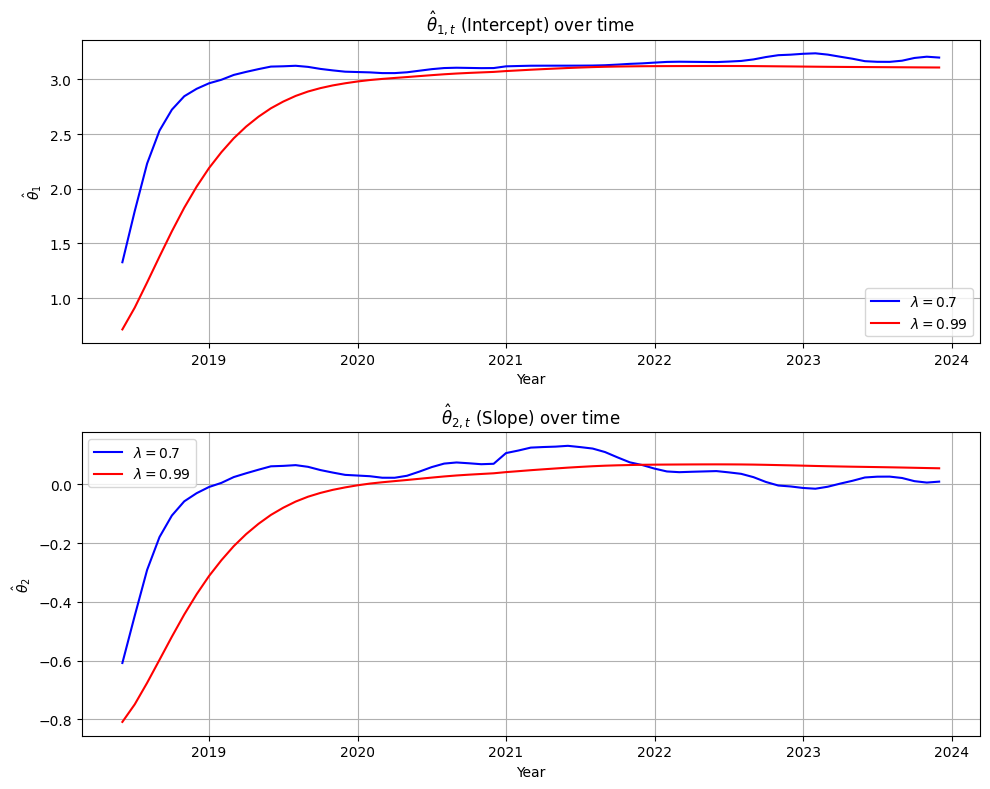

=== Final RLS estimates vs WLS ===
RLS  lambda=0.7  -> theta1=3.1984,  theta2=0.009371
RLS  lambda=0.99 -> theta1=3.1076, theta2=0.054874


In [ ]:
# ============================================================
# 5.4 - RLS with forgetting factor
# ============================================================

def rls_forgetting(R_t,X_train, y3, lmbda):
    """
    RLS with forgetting factor lambda.
    
    x3    : (N, 2) design matrix, same as before [1, year]
    y3    : (N,)   training targets
    lmbda : forgetting factor. 
              lmbda=1   -> standard RLS (no forgetting, global)
              lmbda<1   -> exponential forgetting (local, recent data matters more)
    
    Returns: thetas array of shape (N+1, 2, 1) — one theta per time step
    """
    # Initialize exactly like your teammate did
           # near-zero init so RLS ≈ OLS at t=N
    theta_t = np.array([[0], [0]], dtype=float)
    
    thetas = [theta_t]                     # store initial theta too
    
    for i in np.arange(len(y3)):
        # Build column vector x_t = [1, year_t]^T  — shape (2,1)
        X_t = np.array([[1.0], [X_train[i, 1]]])
        
        # ---- THE ONLY CHANGE FROM 5.3 ----
        # Multiply R by lambda BEFORE adding new info.
        # This exponentially downweights old observations:
        # R_t = lambda*R_{t-1} + x_t x_t^T
        # Without lambda (=1), all observations equally weighted -> global model
        # With lambda<1, old observations shrink -> local model
        R_t = lmbda * R_t + X_t @ X_t.T   # (2,2)
        
        # Innovation: how wrong is current theta on this new observation
        # e_t = y_t - x_t^T * theta_{t-1}    (scalar)
        e_t = y3[i] - X_t.T @ theta_t       # shape (1,1)
        
        # Update theta:
        # theta_t = theta_{t-1} + R_t^{-1} * x_t * e_t
        # np.linalg.solve(A, b) computes A^{-1} b without explicitly inverting
        theta_t = theta_t + np.linalg.solve(R_t, X_t * e_t)   # (2,1)
        
        thetas.append(theta_t)
        
    
    return np.array(thetas)   # shape (N+1, 2, 1)


# ---- Run for both lambda values ----
R_t = np.array([[0.1, 0.0],
                [0.0, 0.1]])  

thetas_07  = rls_forgetting(R_t,X_train, y3, lmbda=0.7)
thetas_099 = rls_forgetting(R_t,X_train, y3, lmbda=0.99)

# Remove initial theta (burn-in starts at t=1 anyway)
# thetas shape: (N+1, 2, 1) -> skip index 0 (the initialization)
burn_in = 5   # skip first few unstable estimates

time_axis = x3[burn_in:, 1]   # year values for x-axis

# Extract theta1 (intercept) and theta2 (slope) over time
# Index 0 = theta1 (intercept), Index 1 = theta2 (slope)
theta1_07  = thetas_07[1:, 0, 0]    # shape (N,)
theta2_07  = thetas_07[1:, 1, 0]

theta1_099 = thetas_099[1:, 0, 0]
theta2_099 = thetas_099[1:, 1, 0]

# ---- Plot theta1 over time ----
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(time_axis, theta1_07[burn_in:],  label=r'$\lambda=0.7$',  color='blue')
axes[0].plot(time_axis, theta1_099[burn_in:], label=r'$\lambda=0.99$', color='red')
axes[0].set_title(r'$\hat{\theta}_{1,t}$ (Intercept) over time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel(r'$\hat{\theta}_1$')
axes[0].legend()
axes[0].grid(True)

# ---- Plot theta2 over time ----
axes[1].plot(time_axis, theta2_07[burn_in:],  label=r'$\lambda=0.7$',  color='blue')
axes[1].plot(time_axis, theta2_099[burn_in:], label=r'$\lambda=0.99$', color='red')
axes[1].set_title(r'$\hat{\theta}_{2,t}$ (Slope) over time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel(r'$\hat{\theta}_2$')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
save_path = "/Users/manostsili/Desktop/dtu/courses/timeseries/θ_for_different_λ.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

# ---- Compare final RLS estimates vs WLS estimates ----
print("=== Final RLS estimates vs WLS ===")
print(f"RLS  lambda=0.7  -> theta1={theta1_07[-1]:.4f},  theta2={theta2_07[-1]:.6f}")
print(f"RLS  lambda=0.99 -> theta1={theta1_099[-1]:.4f}, theta2={theta2_099[-1]:.6f}")
# Compare to your WLS theta_wls from part 4 (run with same lambda)



### Comparing WLS and RLS thetas 


In [81]:
lmbda = 0.99
n_train = len(y) # number of training observations

# The weights are defined as lambda^(N-t), where N is the latest timepoint 
weights = np.array([lmbda**(n_train - i) for i in range(1, n_train + 1)])

# The weight matrix W for WLS
W = np.diag(weights)

sum_wls_weights = np.sum(weights)
sum_ols_weights = n_train


# 4.4 Estimating WLS Parameters 
x_mean = Dtrain["year"].mean()
x3_centered = Dtrain["year"].values - x_mean

X_train = np.c_[np.ones(len(x3_centered)), x3_centered]
y_train = y 

# theta_wls = (X^T * W * X)^-1 * X^T * W * y
XtWX = X_train.T @ W @ X_train
XtWy = X_train.T @ W @ y_train
theta_wls = np.linalg.inv(XtWX) @ XtWy

print(f"WLS Parameter Estimates (lambda={lmbda}):")
print(f"theta1 (Intercept): {theta_wls[0]:.4f}")
print(f"theta2 (Slope): {theta_wls[1]:.4f}")

WLS Parameter Estimates (lambda=0.99):
theta1 (Intercept): 3.1107
theta2 (Slope): 0.0545


In [83]:
# Get RLS final estimates at t=N for lambda=0.9
thetas_099 = rls_forgetting(R_t , X_train, y, lmbda=0.99)
rls_final = thetas_099[-1].flatten()  # shape (2,1) -> (2,)

print(f"WLS theta1: {theta_wls[0]:.6f}, theta2: {theta_wls[1]:.6f}")
print(f"RLS theta1: {float(rls_final[0]):.6f}, theta2: {float(rls_final[1]):.6f}")

WLS theta1: 3.110680, theta2: 0.054533
RLS theta1: 3.107631, theta2: 0.054874


### diference due to initilization of R_t 

In [85]:
# Get RLS final estimates at t=N for lambda=0.9
R_t = 1e-15 * np.eye(2)


thetas_099 = rls_forgetting(R_t,X_train, y3, lmbda=0.99)
rls_final = thetas_099[-1].flatten()  # shape (2,1) -> (2,)

print(f"WLS theta1: {theta_wls[0]:.6f}, theta2: {theta_wls[1]:.6f}")
print(f"RLS theta1: {float(rls_final[0]):.6f}, theta2: {float(rls_final[1]):.6f}")

WLS theta1: 3.110680, theta2: 0.054533
RLS theta1: 3.110680, theta2: 0.054533


### One step prediction

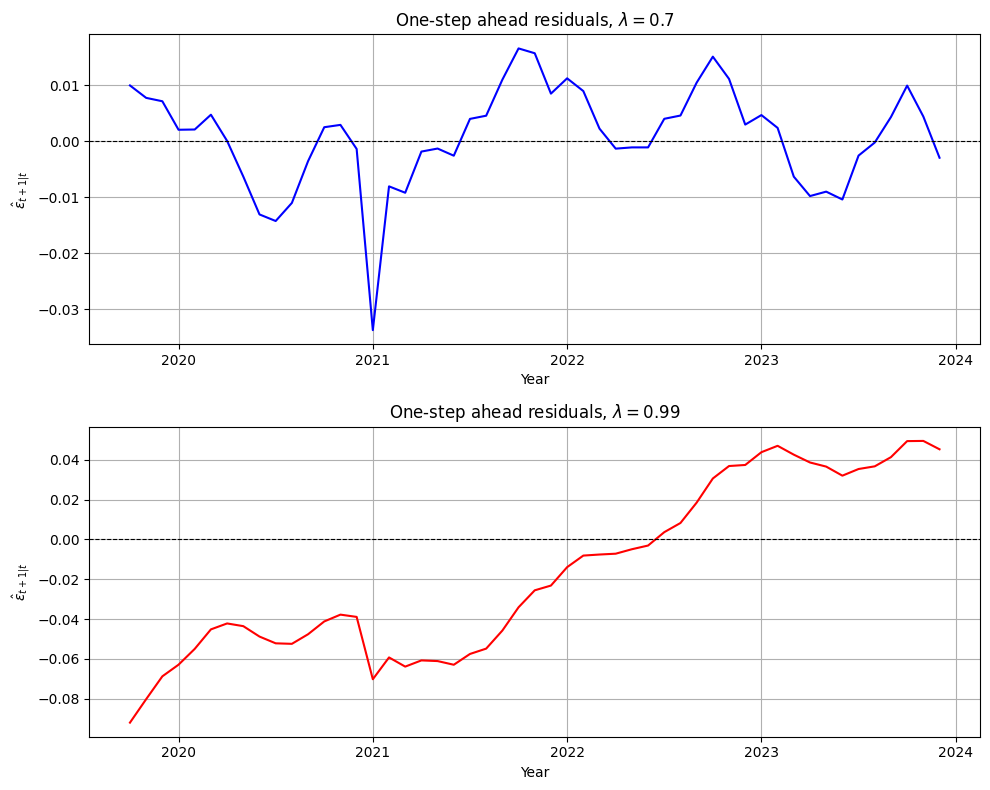

lambda=0.7  | mean residual: 0.000909, std: 0.008919
lambda=0.99 | mean residual: -0.016443, std: 0.042861


In [98]:
def one_step_residuals(X_train, y, lmbda, burn_in=4):
    """
    Compute one-step ahead residuals using RLS with forgetting.
    
    At each time t, use theta_t (estimated from data up to t)
    to predict y_{t+1}, then compute the error.
    
    Returns residuals for t = burn_in, ..., N-1
    """
    R_t     = np.array([[0.1, 0.0],
                        [0.0, 0.1]])
    theta_t = np.array([[0.0],
                        [0.0]])
    
    residuals = []
    times     = []
    
    for i in range(len(y) - 1):   # stop at N-1 because we need y_{t+1}
        X_t = np.array([[1.0], [X_train[i, 1]]])
        y_t = y[i]
        
        # Update R and theta using current observation
        R_t     = lmbda * R_t + X_t @ X_t.T
        e_t     = y_t - X_t.T @ theta_t
        theta_t = theta_t + np.linalg.solve(R_t, X_t * e_t)
        
        # Now predict the NEXT observation using updated theta
        X_next    = np.array([[1.0], [X_train[i+1, 1]]])
        y_pred = (X_next.T @ theta_t).item()
        residual = float(y_pred - y[i+1])        
        residuals.append(residual)
        times.append(Dtrain["year"].values[i+1])  # actual year, not centered
    
    # Remove burn-in
    return np.array(times[burn_in:]), np.array(residuals[burn_in:])


# ---- Run for both lambda values ----
times_07,  resid_07  = one_step_residuals(X_train, y, lmbda=0.7,  burn_in=20)
times_099, resid_099 = one_step_residuals(X_train, y, lmbda=0.99, burn_in=20)

# ---- Plot ----
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(times_07, resid_07, color='blue')
axes[0].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[0].set_title(r'One-step ahead residuals, $\lambda = 0.7$')
axes[0].set_xlabel('Year')
axes[0].set_ylabel(r'$\hat{\varepsilon}_{t+1|t}$')
axes[0].grid(True)

axes[1].plot(times_099, resid_099, color='red')
axes[1].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[1].set_title(r'One-step ahead residuals, $\lambda = 0.99$')
axes[1].set_xlabel('Year')
axes[1].set_ylabel(r'$\hat{\varepsilon}_{t+1|t}$')
axes[1].grid(True)

save_path = "/Users/manostsili/Desktop/dtu/courses/timeseries/one_step_residuals.png"

plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


# ---- Print summary stats ----
print(f"lambda=0.7  | mean residual: {resid_07.mean():.6f}, std: {resid_07.std():.6f}")
print(f"lambda=0.99 | mean residual: {resid_099.mean():.6f}, std: {resid_099.std():.6f}")

### Optimize the forgetting for the horizon k

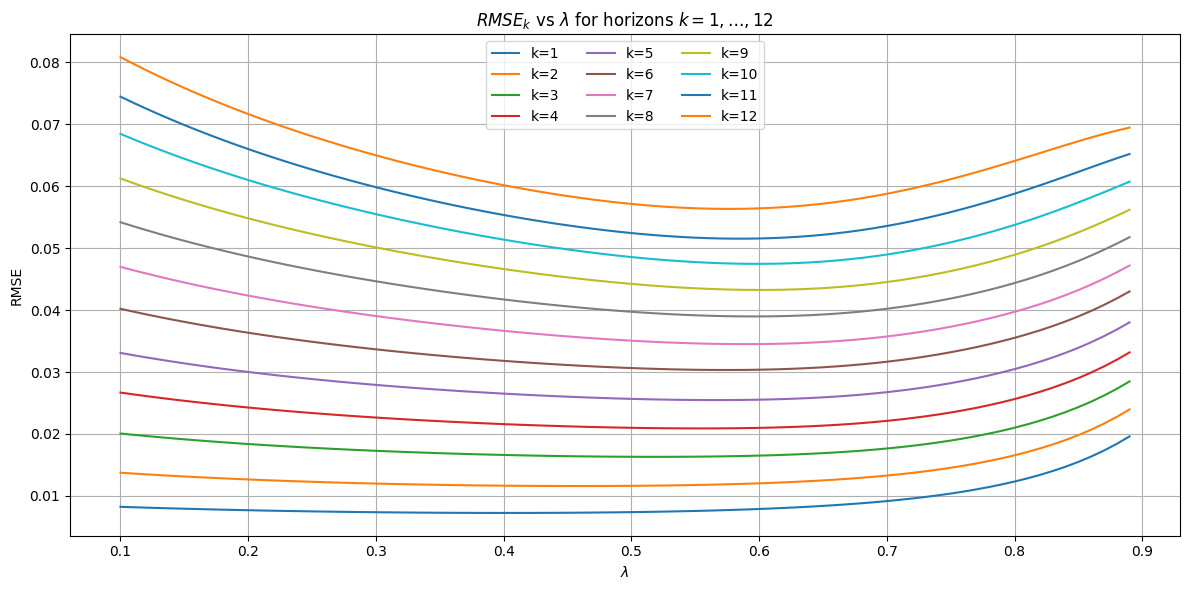

Optimal lambda per horizon:
  k= 1 -> optimal lambda = 0.40, RMSE = 0.007250
  k= 2 -> optimal lambda = 0.46, RMSE = 0.011594
  k= 3 -> optimal lambda = 0.52, RMSE = 0.016307
  k= 4 -> optimal lambda = 0.55, RMSE = 0.020893
  k= 5 -> optimal lambda = 0.57, RMSE = 0.025469
  k= 6 -> optimal lambda = 0.57, RMSE = 0.030326
  k= 7 -> optimal lambda = 0.59, RMSE = 0.034501
  k= 8 -> optimal lambda = 0.60, RMSE = 0.038972
  k= 9 -> optimal lambda = 0.60, RMSE = 0.043248
  k=10 -> optimal lambda = 0.60, RMSE = 0.047460
  k=11 -> optimal lambda = 0.58, RMSE = 0.051526
  k=12 -> optimal lambda = 0.58, RMSE = 0.056332


In [123]:
def k_step_rmse(X_train, y, lmbda, k, burn_in=10):
    """
    Compute k-step ahead RMSE using RLS with forgetting.
    burn_in: exclude first burn_in time steps from error calculation
             to avoid initialization bias corrupting the RMSE.
    """
    R_t     = np.array([[0.1, 0.0],
                        [0.0, 0.1]])
    theta_t = np.array([[0.0],
                        [0.0]])
    
    N = len(y)
    squared_errors = []
    
    for t in range(N - k):
        X_t = np.array([[1.0], [X_train[t, 1]]])
        y_t = y[t]
        
        # Update R and theta with current observation
        R_t     = lmbda * R_t + X_t @ X_t.T
        e_t     = y_t - X_t.T @ theta_t
        theta_t = theta_t + np.linalg.solve(R_t, X_t * e_t)
        
        # Only collect errors after burn-in
        # so initialization doesn't bias the RMSE
        if t >= burn_in:
            X_future = np.array([[1.0], [X_train[t + k, 1]]])
            y_pred   = (X_future.T @ theta_t).item()
            error    = y_pred - y[t + k]
            squared_errors.append(error**2)
    
    return np.sqrt(np.mean(squared_errors))


# Extend lambda range to see the full curve shape
lambdas  = np.arange(0.1, 0.9, 0.01)   
horizons = np.arange(1, 13)

rmse_grid = np.zeros((len(lambdas), len(horizons)))

for i, lmbda in enumerate(lambdas):
    for j, k in enumerate(horizons):
        rmse_grid[i, j] = k_step_rmse(X_train, y, lmbda, k, burn_in=30)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(12, 6))
for j, k in enumerate(horizons):
    ax.plot(lambdas, rmse_grid[:, j], label=f'k={k}')

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('RMSE')
ax.set_title(r'$RMSE_k$ vs $\lambda$ for horizons $k = 1, \ldots, 12$')
ax.legend(ncol=3)
ax.grid(True)

save_path = "/Users/manostsili/Desktop/dtu/courses/timeseries/rmse_lambda.png"

plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

# ---- Optimal lambda per horizon ----
print("Optimal lambda per horizon:")
for j, k in enumerate(horizons):
    opt_idx    = np.argmin(rmse_grid[:, j])
    opt_lambda = lambdas[opt_idx]
    opt_rmse   = rmse_grid[opt_idx, j]
    print(f"  k={k:2d} -> optimal lambda = {opt_lambda:.2f}, RMSE = {opt_rmse:.6f}")

###  Test set predictions using RLS


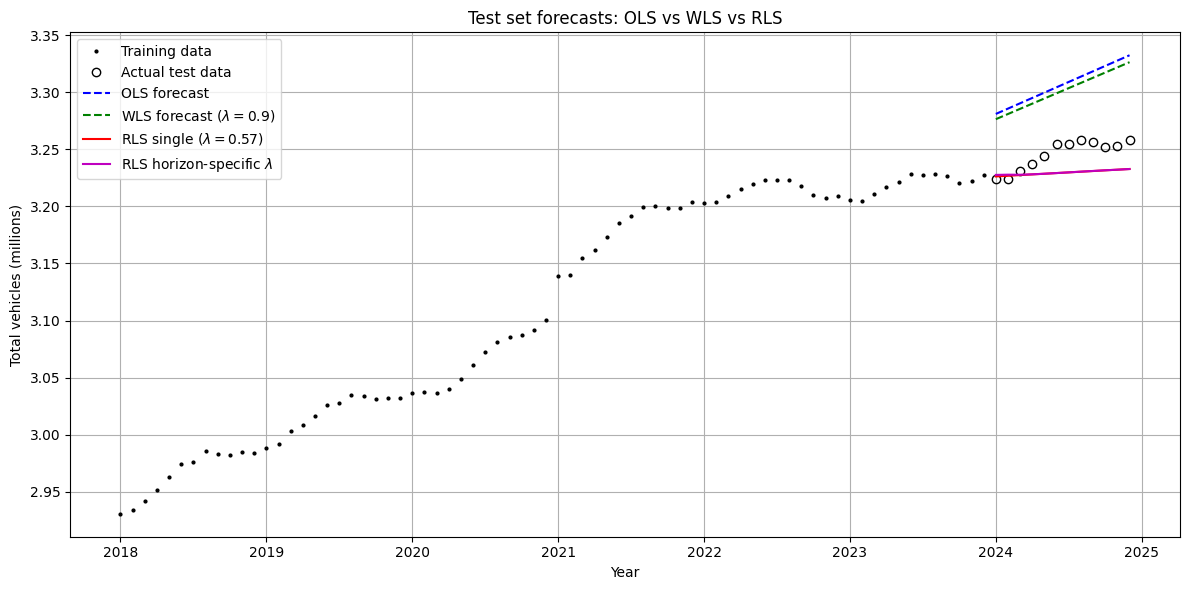

Month    Actual     OLS        WLS        RLS(0.57)    RLS(opt)  
------------------------------------------------------------
2024.000  3.2238     3.2812     3.2766     3.2263       3.2277    
2024.083  3.2238     3.2858     3.2811     3.2269       3.2279    
2024.167  3.2312     3.2905     3.2856     3.2275       3.2278    
2024.250  3.2376     3.2952     3.2902     3.2281       3.2282    
2024.333  3.2446     3.2999     3.2947     3.2287       3.2287    
2024.417  3.2551     3.3045     3.2993     3.2293       3.2293    
2024.500  3.2546     3.3092     3.3038     3.2299       3.2299    
2024.583  3.2581     3.3139     3.3084     3.2305       3.2305    
2024.667  3.2565     3.3186     3.3129     3.2311       3.2311    
2024.750  3.2523     3.3233     3.3175     3.2317       3.2317    
2024.833  3.2531     3.3279     3.3220     3.2323       3.2323    
2024.917  3.2580     3.3326     3.3265     3.2329       3.2328    


In [126]:
# ============================================================
# 5.7 - Test set predictions using RLS
# ============================================================

def rls_final_theta(X_train, y, lmbda):
    """
    Run RLS through entire training set and return final theta.
    This is the theta we use to forecast the test set.
    """
    R_t     = np.array([[0.1, 0.0],
                        [0.0, 0.1]])
    theta_t = np.array([[0.0],
                        [0.0]])
    
    for i in range(len(y)):
        X_t     = np.array([[1.0], [X_train[i, 1]]])
        R_t     = lmbda * R_t + X_t @ X_t.T
        e_t     = y[i] - X_t.T @ theta_t
        theta_t = theta_t + np.linalg.solve(R_t, X_t * e_t)
    
    return theta_t   # shape (2,1)


# ---- Build test design matrix (centered!) ----
x_mean  = Dtrain["year"].mean()
x_test_centered = Dtest["year"].values - x_mean
X_test  = np.c_[np.ones(len(x_test_centered)), x_test_centered]  # (12, 2)

# ---- Option 1: Single lambda (λ=0.57 from 5.6 optimization) ----
lmbda_single = 0.57
theta_rls_single = rls_final_theta(X_train, y, lmbda=lmbda_single)

# Forecast all 12 test months using same theta
y_pred_rls_single = np.array([
    (X_test[k].reshape(2,1).T @ theta_rls_single).item()
    for k in range(12)
])

# ---- Option 2: Horizon-specific lambda from 5.6 ----
optimal_lambdas = {
    1: 0.40, 2: 0.46, 3: 0.52, 4: 0.55,
    5: 0.57, 6: 0.57, 7: 0.59, 8: 0.60,
    9: 0.60, 10: 0.60, 11: 0.58, 12: 0.58
}

y_pred_rls_optimal = np.zeros(12)
for k in range(1, 13):
    lmbda_k  = optimal_lambdas[k]
    theta_k  = rls_final_theta(X_train, y, lmbda=lmbda_k)
    # Predict k steps ahead from end of training
    y_pred_rls_optimal[k-1] = (X_test[k-1].reshape(2,1).T @ theta_k).item()

# ---- OLS predictions (from part 3, using centered x) ----
y_pred_ols = theta[0] + theta[1] * Dtest["year"].values

# ---- WLS predictions (from part 4, using centered x) ----
y_pred_wls = theta_wls[0] + theta_wls[1] * x_test_centered

# ---- Plot ----
fig, ax = plt.subplots(figsize=(12, 6))

# Training data
ax.plot(Dtrain["year"], y, 'k.', label='Training data', markersize=4)

# Actual test data
ax.plot(Dtest["year"], y_test, 'ko', mfc='none', label='Actual test data', markersize=6)

# OLS forecast
ax.plot(Dtest["year"], y_pred_ols, 'b--', label='OLS forecast', linewidth=1.5)

# WLS forecast (lambda=0.9)
ax.plot(Dtest["year"], y_pred_wls, 'g--', label=r'WLS forecast ($\lambda=0.9$)', linewidth=1.5)

# RLS single lambda
ax.plot(Dtest["year"], y_pred_rls_single, 'r-',
        label=rf'RLS single ($\lambda={lmbda_single}$)', linewidth=1.5)

# RLS horizon-specific lambda
ax.plot(Dtest["year"], y_pred_rls_optimal, 'm-',
        label=r'RLS horizon-specific $\lambda$', linewidth=1.5)

ax.set_xlabel('Year')
ax.set_ylabel('Total vehicles (millions)')
ax.set_title('Test set forecasts: OLS vs WLS vs RLS')
ax.legend()
ax.grid(True)
save_path = "/Users/manostsili/Desktop/dtu/courses/timeseries/test_set_forecasts.png"

plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

# ---- Print forecast table ----
print(f"{'Month':<8} {'Actual':<10} {'OLS':<10} {'WLS':<10} "
      f"{'RLS(0.57)':<12} {'RLS(opt)':<10}")
print("-" * 60)
for i in range(12):
    print(f"{Dtest['year'].values[i]:.3f}  "
          f"{y_test[i]:<10.4f} "
          f"{y_pred_ols[i]:<10.4f} "
          f"{y_pred_wls[i]:<10.4f} "
          f"{y_pred_rls_single[i]:<12.4f} "
          f"{y_pred_rls_optimal[i]:<10.4f}")

<>:31: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:51: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:92: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:31: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:51: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:92: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
/var/folders/2w/4_sfnk5966zfh99dg079bc780000gn/T/ipykernel_38819/552633835.p

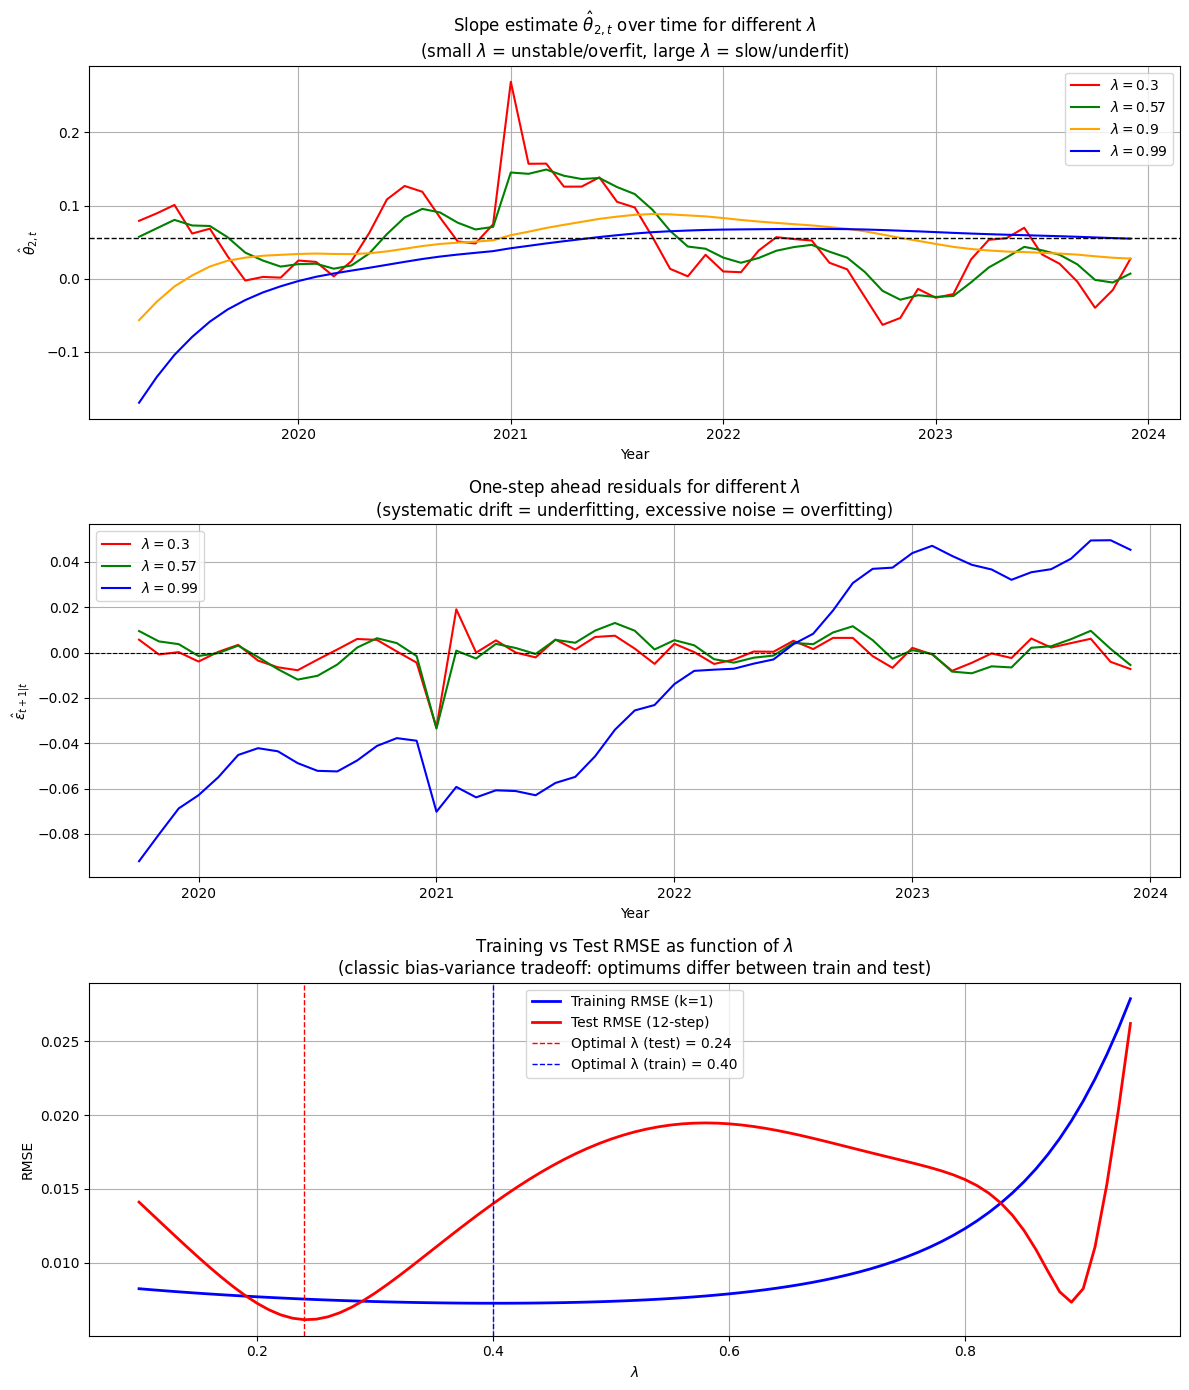

Optimal lambda on TRAINING (k=1): 0.40, RMSE=0.007250
Optimal lambda on TEST (12-step): 0.24, RMSE=0.006137


In [127]:
# ============================================================
# 5.8 - Overfitting vs Underfitting visualization
# ============================================================

fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# ---- Plot 1: Parameter instability (overfitting with small lambda) ----
# Show theta2 (slope) over time for multiple lambda values
# Small lambda -> slope jumps around (overfit to local noise)
# Large lambda -> slope barely moves (underfit, too global)

lambda_vals = [0.3, 0.57, 0.9, 0.99]
colors      = ['red', 'green', 'orange', 'blue']

for lmbda, color in zip(lambda_vals, colors):
    thetas = rls_forgetting(
        np.array([[0.1, 0.0], [0.0, 0.1]]),
        X_train, y, lmbda=lmbda
    )
    theta2 = thetas[1:, 1, 0]   # slope over time, skip init
    burn   = 15
    axes[0].plot(
        Dtrain["year"].values[burn:],
        theta2[burn:],
        label=rf'$\lambda={lmbda}$',
        color=color
    )

axes[0].set_title(
    r'Slope estimate $\hat{\theta}_{2,t}$ over time for different $\lambda$'
    '\n(small $\lambda$ = unstable/overfit, large $\lambda$ = slow/underfit)'
)
axes[0].set_xlabel('Year')
axes[0].set_ylabel(r'$\hat{\theta}_{2,t}$')
axes[0].legend()
axes[0].grid(True)
axes[0].axhline(theta[1], color='black', linestyle='--',
                linewidth=1, label='OLS slope')


# ---- Plot 2: One-step residuals for extreme lambda values ----
# Small lambda -> small but noisy residuals (overfit locally)
# Large lambda -> large systematic drift (underfit globally)

for lmbda, color in zip([0.3, 0.57, 0.99], ['red', 'green', 'blue']):
    times, resids = one_step_residuals(X_train, y, lmbda=lmbda, burn_in=20)
    axes[1].plot(times, resids, label=rf'$\lambda={lmbda}$', color=color)

axes[1].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[1].set_title(
    'One-step ahead residuals for different $\lambda$'
    '\n(systematic drift = underfitting, excessive noise = overfitting)'
)
axes[1].set_xlabel('Year')
axes[1].set_ylabel(r'$\hat{\varepsilon}_{t+1|t}$')
axes[1].legend()
axes[1].grid(True)


# ---- Plot 3: RMSE on training vs test set as function of lambda ----
# This is the classic bias-variance U-shape
# Training RMSE: k=1 RMSE computed on training set (already done in 5.6)
# Test RMSE: forecast error on the actual 2024 test set

lambdas     = np.arange(0.1, 0.95, 0.01)
train_rmse  = []   # k=1 RMSE on training (from 5.6 logic)
test_rmse   = []   # 12-step forecast RMSE on test set

for lmbda in lambdas:
    # Training RMSE (k=1, burn_in=30)
    tr = k_step_rmse(X_train, y, lmbda, k=1, burn_in=30)
    train_rmse.append(tr)
    
    # Test RMSE: run RLS to get final theta, forecast all 12 test months
    theta_final = rls_final_theta(X_train, y, lmbda=lmbda)
    y_pred_test = np.array([
        (X_test[k].reshape(2,1).T @ theta_final).item()
        for k in range(12)
    ])
    te = np.sqrt(np.mean((y_pred_test - y_test)**2))
    test_rmse.append(te)

axes[2].plot(lambdas, train_rmse, 'b-',  label='Training RMSE (k=1)', linewidth=2)
axes[2].plot(lambdas, test_rmse,  'r-',  label='Test RMSE (12-step)', linewidth=2)
axes[2].axvline(lambdas[np.argmin(test_rmse)], color='red',
                linestyle='--', linewidth=1,
                label=f'Optimal λ (test) = {lambdas[np.argmin(test_rmse)]:.2f}')
axes[2].axvline(lambdas[np.argmin(train_rmse)], color='blue',
                linestyle='--', linewidth=1,
                label=f'Optimal λ (train) = {lambdas[np.argmin(train_rmse)]:.2f}')
axes[2].set_title(
    'Training vs Test RMSE as function of $\lambda$\n'
    '(classic bias-variance tradeoff: optimums differ between train and test)'
)
axes[2].set_xlabel(r'$\lambda$')
axes[2].set_ylabel('RMSE')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

# ---- Print summary ----
print(f"Optimal lambda on TRAINING (k=1): "
      f"{lambdas[np.argmin(train_rmse)]:.2f}, "
      f"RMSE={min(train_rmse):.6f}")
print(f"Optimal lambda on TEST (12-step): "
      f"{lambdas[np.argmin(test_rmse)]:.2f}, "
      f"RMSE={min(test_rmse):.6f}")